In [1]:
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig
config = ECConfig() 
track_api = TrackAPI(api_client=DownloadClient(config=config))


from eda_quality import correction as correct
from eda_quality import manipulation as manipulate
from eda_quality import inspection as inspect

In [2]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=10) 

### Pearson Correlation Matrix

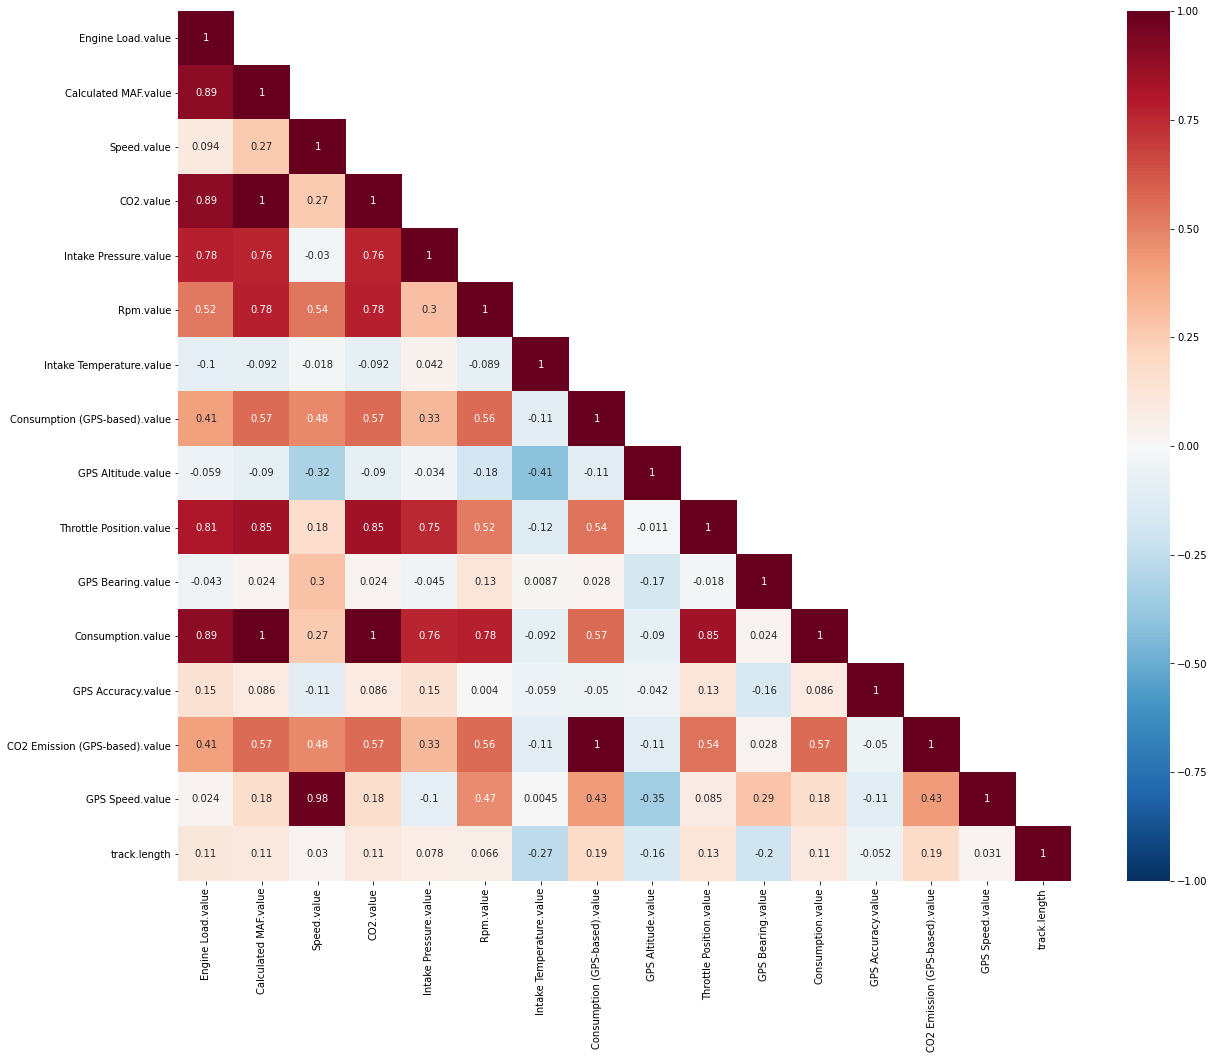

In [3]:
inspect.correlation_heatmap_triangle(track_df, 'pearson')

### Spearman Correlation Matrix
The intuition for the Spearman’s rank correlation is that it calculates a Pearson’s correlation 
(i.e. a parametric measure of correlation) using the rank values instead of the real values. 

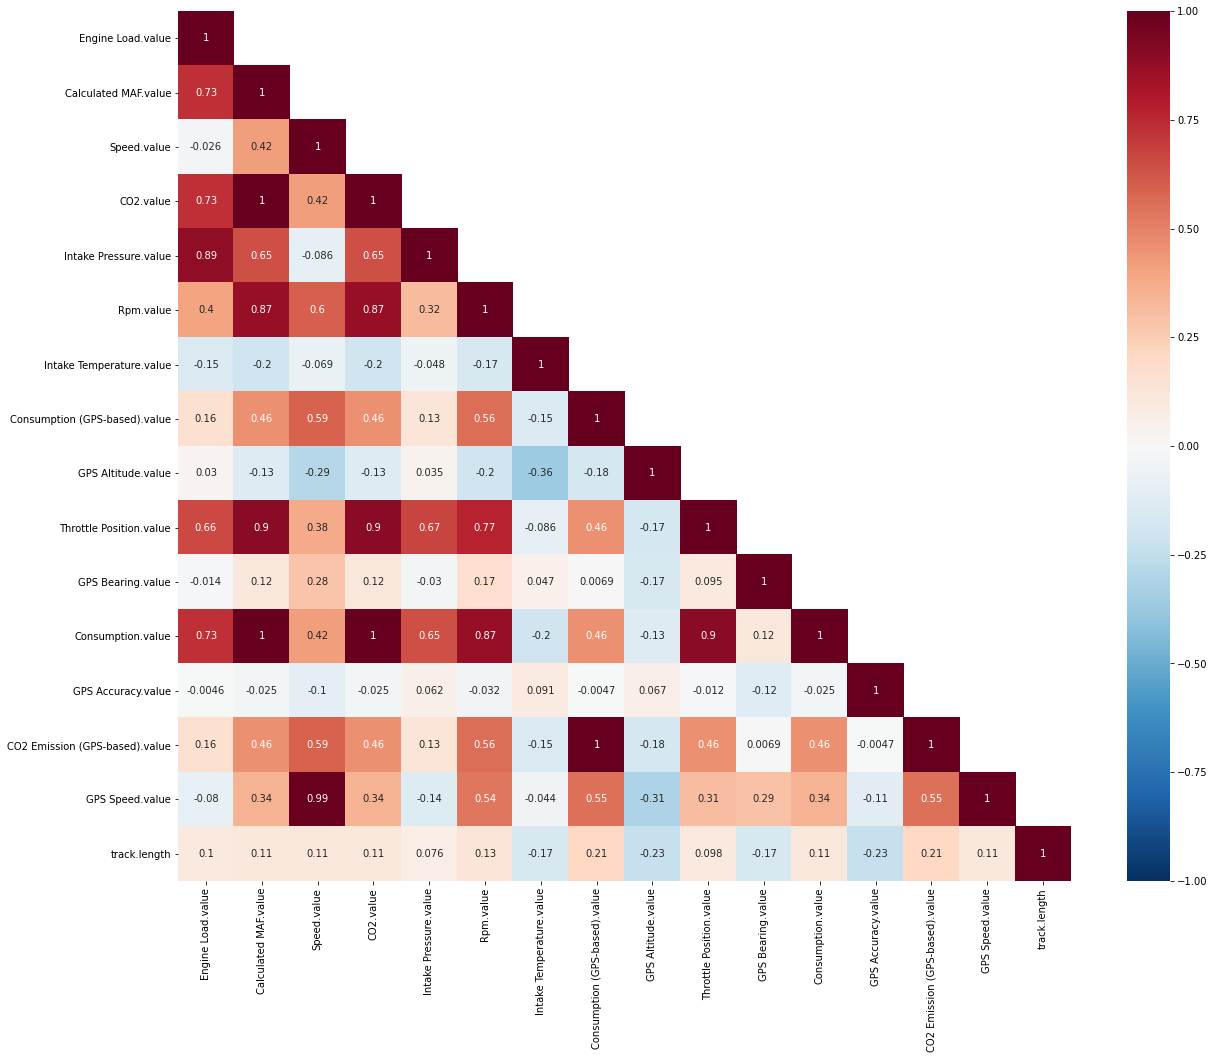

In [4]:
inspect.correlation_heatmap_triangle(track_df, 'spearman')

Get correlations classifed according to their strengths

In [5]:
# Correlation coeffefficients strength classes:
#.00-.39  weak
#.40-.59  moderate
#.60-.79  strong
#.80-1.0  very strong

allCoeffs, very_strong, strong, moderate, weak  = inspect.get_classified_correlations(track_df, 'spearman')

We are interested in very strong correlational relationships (coefficient > 0.8)

In [6]:
very_strong

,column,index,coefficient
0,Speed.value,GPS Speed.value,0.989138
1,Calculated MAF.value,Throttle Position.value,0.899844
2,CO2.value,Throttle Position.value,0.899844
3,Throttle Position.value,Consumption.value,0.899844
4,Engine Load.value,Intake Pressure.value,0.889848
5,Calculated MAF.value,Rpm.value,0.874825
6,CO2.value,Rpm.value,0.874825
7,Rpm.value,Consumption.value,0.874825


If we are interested in the correlation between two specific variables, we can give the following command:

In [7]:
inspect.get_correlation(track_df, 'spearman', 'Intake Pressure.value', 'Engine Load.value')

,v1,v2,coefficient
8,Intake Pressure.value,Engine Load.value,0.889848


In [8]:
inspect.get_correlation(track_df, 'pearson', 'Intake Pressure.value', 'Engine Load.value')

,v1,v2,coefficient
23,Intake Pressure.value,Engine Load.value,0.777137
